<a href="https://colab.research.google.com/github/ryoojunsang/2023S-Ajou-ML/blob/main/vgg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical
import pickle

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_rand():
    X=[]
    dir_path='/content/drive/MyDrive/MACHINE/fruit_images'
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for sub_dir2 in tqdm(os.listdir(path_main)):
          path_main2=os.path.join(path_main,sub_dir2)
          i=0
          for img_name in os.listdir(path_main2):
              if i>=6:
                  break
              img=cv2.imread(os.path.join(path_main2,img_name))
              img=cv2.resize(img,(100,100))
              img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
              X.append(img)
              i+=1
    return X

In [ ]:
X=load_rand()

In [ ]:
X=np.array(X)
X.shape

In [ ]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['freshwatermelone', 'freshstrawberry', 'freshtomato', 'rottenwatermelone', 'rottenstrawberry', 'rottentomato']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

In [ ]:
show_subpot(X)

In [ ]:
del X

# Rotten vs fresh

In [ ]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    main_dir = '/content/drive/MyDrive/MACHINE/fruit_images'
    for cata in tqdm(os.listdir(main_dir)):
        print(cata)
        if quality[0] == cata:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,0])
        else:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [ ]:
X,Y=load_rottenvsfresh()

In [ ]:
Y=np.array(Y)
X=np.array(X)
print(X)
print(Y)

In [ ]:
y_ser=pd.Series(Y)
y_ser.value_counts()

In [ ]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    main_dir = '/content/drive/MyDrive/MACHINE/fruit_images'
    for cata in tqdm(os.listdir(main_dir)):
        print(cata)
        if quality[0] == cata:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,0])
        else:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [ ]:
X_val,Y_val=load_rottenvsfresh_valset()

In [ ]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

In [24]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

X, Y = load_rottenvsfresh()
X = np.array(X)
Y = np.array(Y)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

X_train = X_train / 255.0
X_test = X_test / 255.0

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)
datagen.fit(X_train)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

base_model.trainable = False

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=20, validation_data=(X_test, Y_test))

loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)



  0%|          | 0/2 [00:00<?, ?it/s]

rotten


 50%|█████     | 1/2 [00:09<00:09,  9.22s/it]

fresh


100%|██████████| 2/2 [00:59<00:00, 29.92s/it]


Shuffling your data.....


100%|██████████| 1720/1720 [00:00<00:00, 979924.32it/s]


Epoch 1/20
43/43 [==============================] - 253s 6s/step - loss: 0.7762 - accuracy: 0.6650 - val_loss: 0.4594 - val_accuracy: 0.7878
Epoch 2/20
43/43 [==============================] - 208s 5s/step - loss: 0.4504 - accuracy: 0.7958 - val_loss: 0.4662 - val_accuracy: 0.7791
Epoch 3/20
43/43 [==============================] - 250s 6s/step - loss: 0.4014 - accuracy: 0.8154 - val_loss: 0.3905 - val_accuracy: 0.8198
Epoch 4/20
43/43 [==============================] - 250s 6s/step - loss: 0.3885 - accuracy: 0.8256 - val_loss: 0.3892 - val_accuracy: 0.8110
Epoch 5/20
43/43 [==============================] - 249s 6s/step - loss: 0.3682 - accuracy: 0.8292 - val_loss: 0.3857 - val_accuracy: 0.8256
Epoch 6/20
43/43 [==============================] - 267s 6s/step - loss: 0.3571 - accuracy: 0.8408 - val_loss: 0.3723 - val_accuracy: 0.8256
Epoch 7/20
43/43 [==============================] - 251s 6s/step - loss: 0.3499 - accuracy: 0.8503 - val_loss: 0.3750 - val_accuracy: 0.8459
Epoch 8/20
43

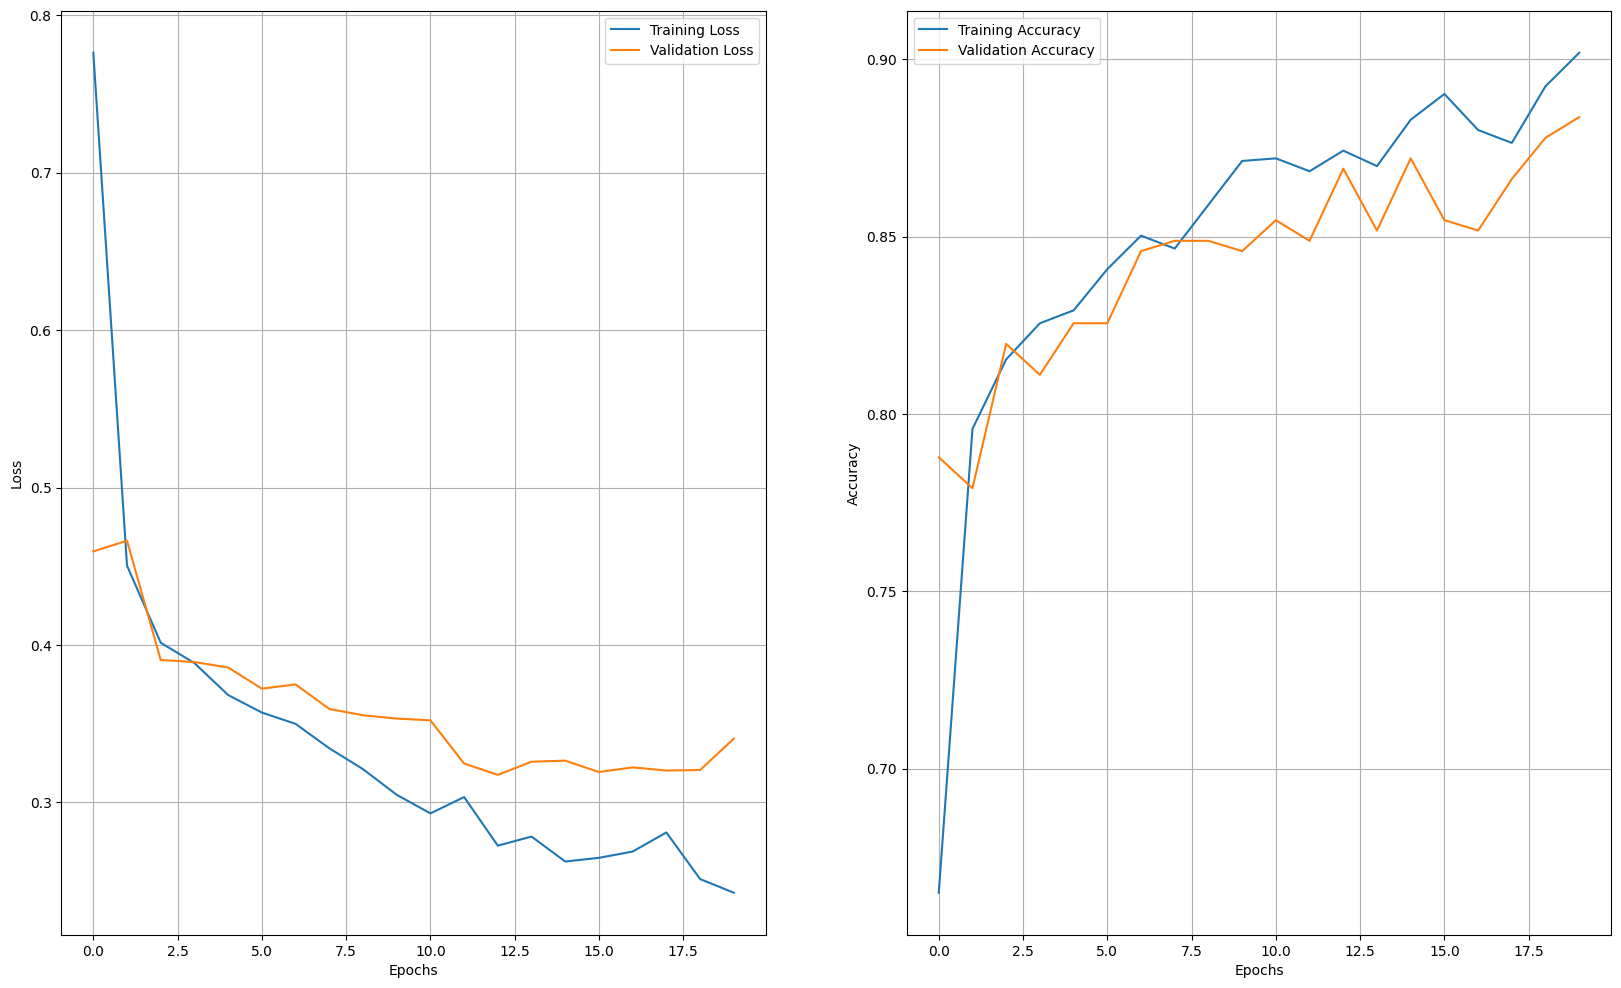

In [25]:
# Loss 그래프
plt.figure(1, figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.grid(True)
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.grid(True)
plt.legend()